# Метод Монте-Карло в физике

Методами Монте-Карло называют множество различных методов в совершенно разных областях от физики до экономики. Основная суть этих методов заключается в использовании случайных величин для получения различных состояний исследуемой системы. 

Одно из частых применений метода Монте-Карло в физике состоит в расчете интегралов. При этом действительно полезным и незаменимым метод становится при работе с большим количеством измерений, когда построение обычных квадратур приводит к чересчур  огромным сеткам. Например, уже в случае 10 измерений, задание обычной равномерной решетки шириной в $2^4 = 16$ узлов, приводит к общей сетке размера $2^{40} \simeq 10^{12}$. Массив данных float такого размера будет занимать 4ТБ в памяти компьютера. Оперировать такими интегралами стандартными методами становится принципиально невозможно.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
plt.style.use('ggplot')
%matplotlib notebook

## Задание 1
Вычислим объем многомерной сферы в большом количестве измерений.

### Задание 1.1 
Напишите функцию, вычисляющую точный объем $d$-мерной сферы с помощью явного выражения. 
Объем многомерной сферы радиуса $R$ в $d$-измерениях дается формулой: 
$$
V_d = \frac{\pi^{d/2}} {\Gamma(1 + d/2)}
$$
где $\Gamma(x)$ - гамма функция, значение которой можно получить из scipy.special.

In [8]:
def getSphereVolumeExact(D, R = 1.0):
    return np.pi**(D/2)/sp.gamma(1+D/2)

1. Проверьте результат для нескольких известных вам значений. 
2. Построите график V(D)

In [9]:
#Для случая D = 1
print(2 -getSphereVolumeExact(1))

0.0


In [10]:
#Для случая D = 2
print(np.pi - getSphereVolumeExact(2))


0.0


In [11]:
#Для случая D = 3
print(4/3*np.pi - getSphereVolumeExact(3))

-8.881784197001252e-16


Как видим, наша формула прекрасно соотносится с теоретическими формулами.

<IPython.core.display.Javascript object>


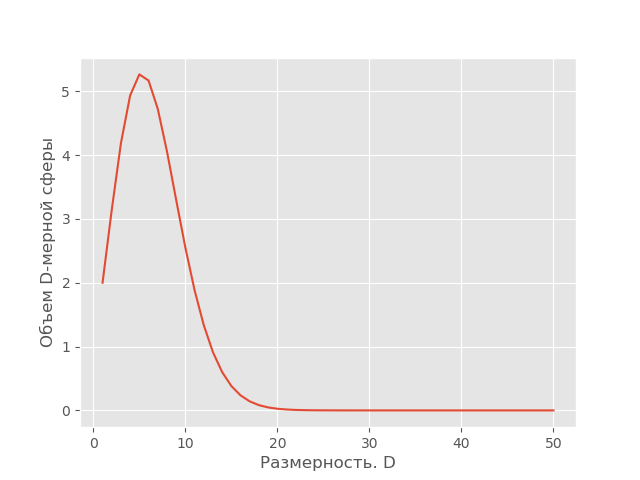

In [12]:
x = np.linspace(1,50)
plt.figure()
plt.plot(x,[getSphereVolumeExact(i) for i in(x)])
plt.xlabel('Размерность. D')
plt.ylabel('Объем D-мерной сферы')
plt.show()

### Задание 1.2
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на псевдослучайных числах (используя, например `numpy.random.rand`).

In [13]:
def getSphereVolumePseudorandom(N, D, R = 1):
    dots = np.random.uniform(low=-R, high=R, size=(N,D)) 
    right = []
    for i in range(N):
        if np.linalg.norm(dots[i,:]) <= 1:
            right.append(1)
    return 2**D*np.sum(right)/N

Постройте график зависимости относительной точности $\epsilon$ которая достигается при фиксированном $N$ от размерности сферы $D$. Для относительной точности используйте выражение $\epsilon = (V_{exact} - V_{random})/V_{exact}$.

In [15]:
def eps(N,D):
    return np.abs((getSphereVolumeExact(D) - getSphereVolumePseudorandom(N,D))/getSphereVolumeExact(D))

Количество точек: 1


<IPython.core.display.Javascript object>


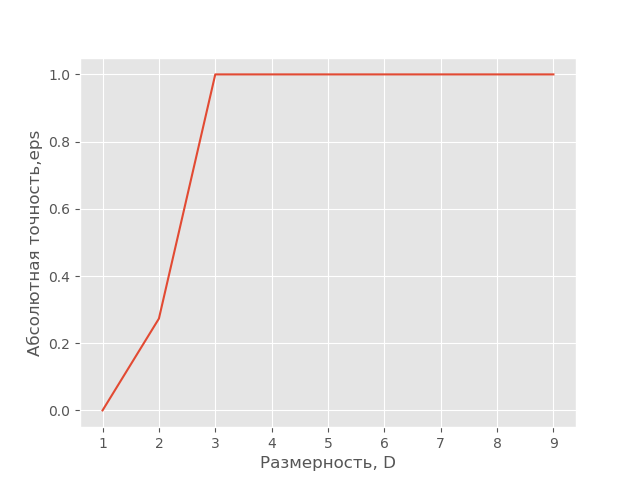

Количество точек: 10


<IPython.core.display.Javascript object>


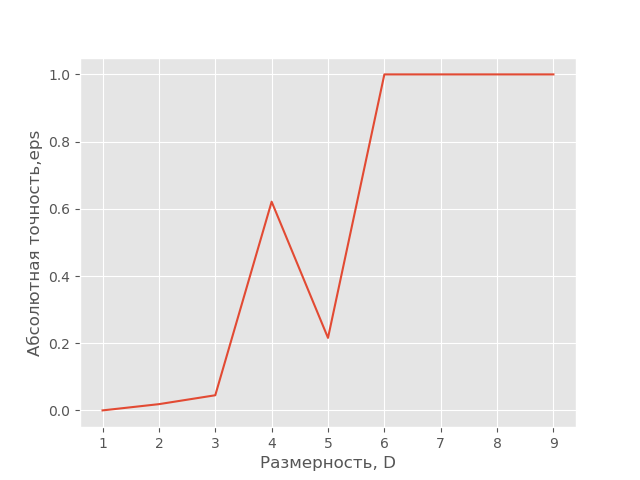

Количество точек: 100


<IPython.core.display.Javascript object>


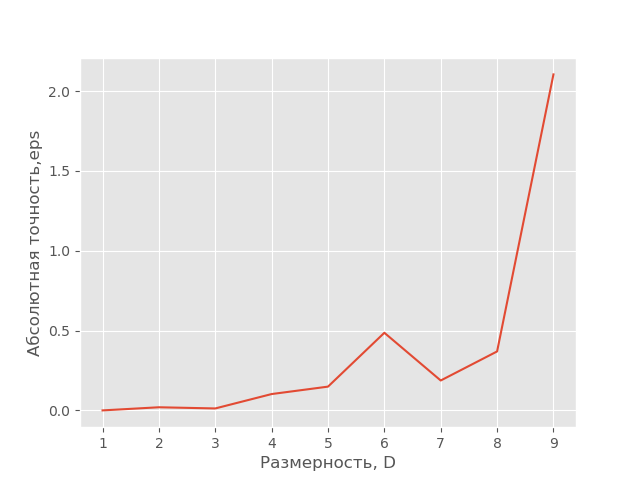

Количество точек: 1000


<IPython.core.display.Javascript object>


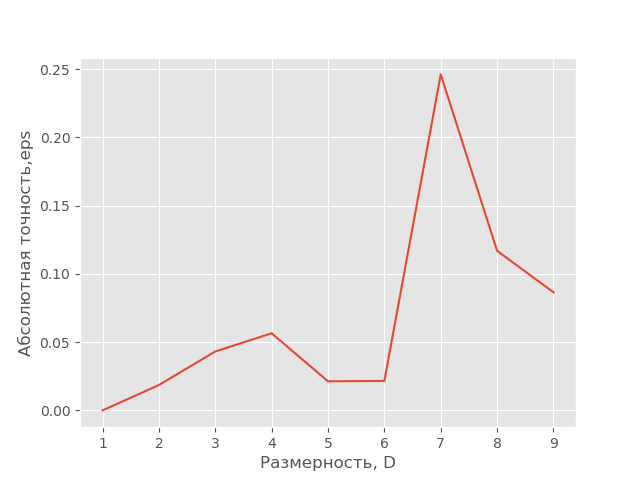

Количество точек: 10000


<IPython.core.display.Javascript object>


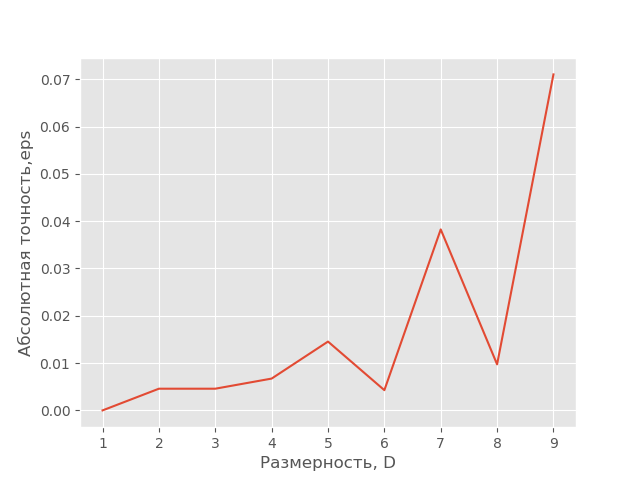

Количество точек: 100000


<IPython.core.display.Javascript object>


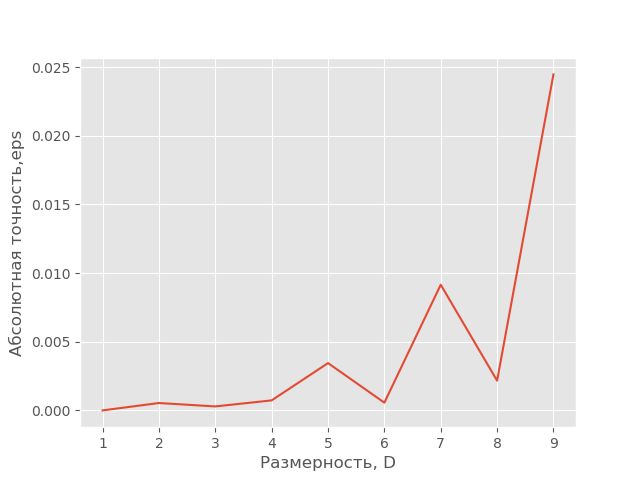

In [50]:
x = [i for i in range(1,10)]
N_1 = [10**i for i in range(1,6)]
for j in(N_1):
    print('Количество точек:', j)
    plt.figure()
    plt.plot(x,[eps(j,k) for k in(x)])
    plt.xlabel('Размерность, D')
    plt.ylabel('Абсолютная точность,eps')
    plt.show()

С увеличением количества точек растет абсолютная точность, что и ожидалось

### Задание 1.3
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на квазислучайной последовательности Соболя.

Для установки библиотеки `sobol_seq`:


выполните `pip install sobol_seq` в Jupyter или

выполните команду `pip install sobol_seq --user` в командном окне (если вы используете Jupyter Notebook в составе Anaconda откройте Anaconda Prompt и выполните команду pip в ней, после чего перезапустите Jupyter Notebook).


In [16]:
#!pip install sobol_seq <-- uncomment to install sobol_seq
import sobol_seq

Используйте функцию `i4_sobol_generate`. Документацию по ней можно получить выполнив следующую строчку кода:

In [17]:
sobol_seq.i4_sobol_generate?

In [21]:
def getSphereVolumeQuasirandom(N, D, R = 1):
    #Сделаем, как раньше, только теперь точки по-другому будут генерироваться
    dots = sobol_seq.i4_sobol_generate(D,N) 
    right = []
    for i in range(N):
        if np.linalg.norm(dots[i,:]) <= 1:
            right.append(1)
    return 2**D*np.sum(right)/N
    return V

Сравните точность вычисления объема для квазислучайной и псевдослучайной последовательностей, рассчитав  $\epsilon(D)$, при таком же значении $N$, как в предыдущем задании. Постройте обе зависимости $\epsilon(D)$ на одном графике в логарифмической шкале по $\epsilon$.

In [25]:
def eps1(N,D):
    return np.abs((getSphereVolumeExact(D) - getSphereVolumeQuasirandom(N,D))/ getSphereVolumeExact(D))

Количество точек: 10


<IPython.core.display.Javascript object>


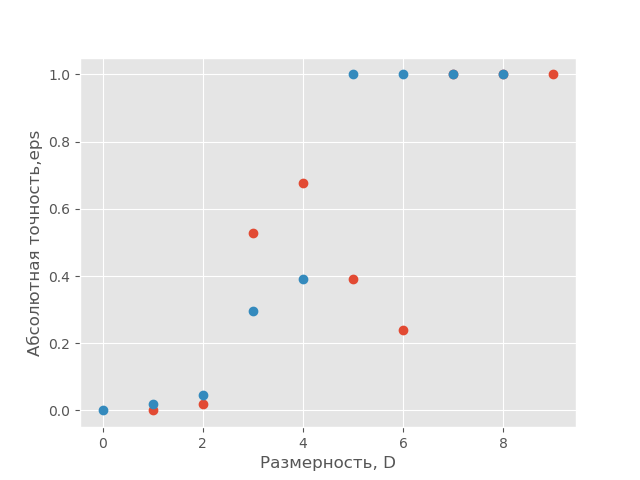

Количество точек: 100


<IPython.core.display.Javascript object>


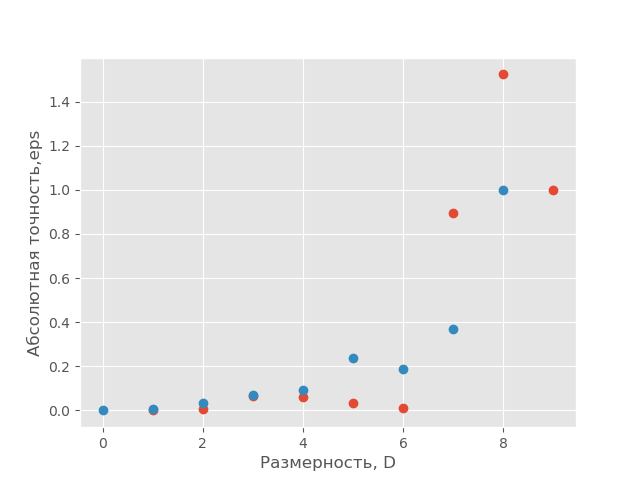

Количество точек: 1000


<IPython.core.display.Javascript object>


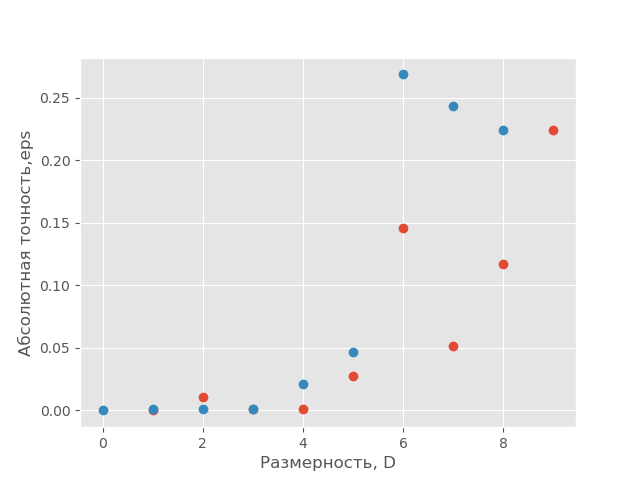

Количество точек: 10000


<IPython.core.display.Javascript object>


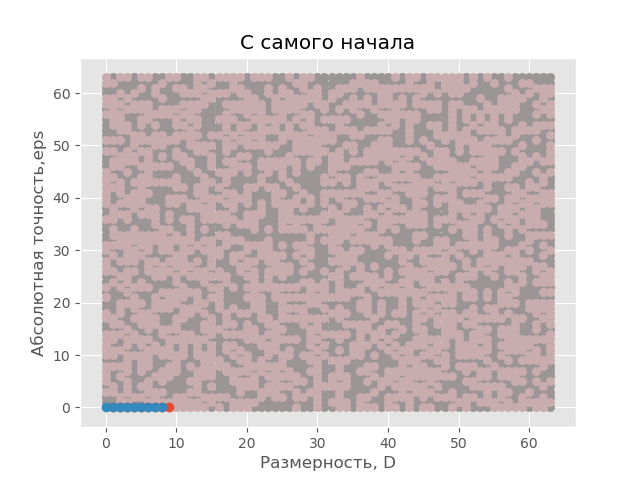

Количество точек: 100000


<IPython.core.display.Javascript object>


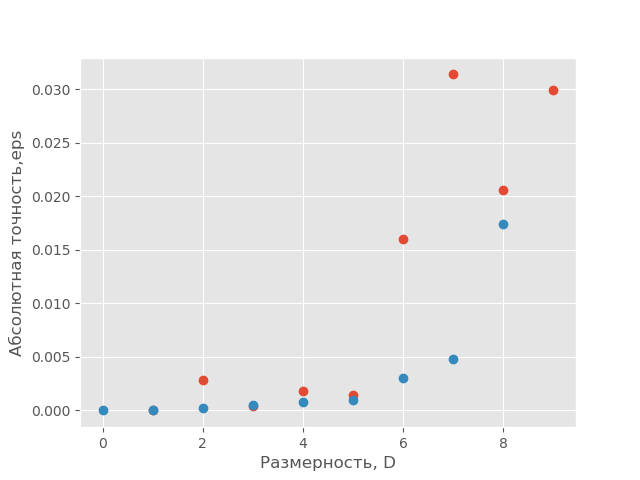

In [26]:
x = [i for i in range(1,10)]
N_1 = [10**i for i in range(1,6)]
for j in(N_1):
    print('Количество точек:', j)
    plt.figure()
    plt.plot(x,[eps(j,k) for k in(x)],'o', [eps1(j,k) for k in(x)], 'o')
    plt.xlabel('Размерность, D')
    plt.ylabel('Абсолютная точность,eps')
    plt.show()

Сделайте вывды о работе псевдослучайной и квазислучайной последовательностях. 

Видим, что при N ~ $10^5$ точность квази случая начинает становиться лучше во всех размерностях, поэтому отсюда можно сделать вывод, что если будет брать N~$10^5$, то надо пользоваться квази рандомом. Так как при случаях, когда порядок точек меньше, там уже начинются какие-то непонятки: либо одно лучше, либо другое. 
Поэтому итог один:
Лучше брать больше точек и использовать последовательность Соболя

## Задание 2

Рассмотрим решетку $n\times n$, в которой каждой ячейке соответствует спин $\sigma_i$ равный $+1$ или $-1$. При этом между соседними ячейками существует энергия взаимодействия
$$
E_i = -J \sigma_i \sigma_j
$$
Тогда энергия каждой ячейки 
$$
E_i = -J \sigma_i \sum_j \sigma_j
$$
где суммирование подразумевается только по соседним с $i$-ой ячейкой.

При нулевой температуре энергитически более выгодным состоянием является состояние, когда все спины одинаково ориентированы. Однако при ненулевой температуре вероятность перехода в более возбужденное состояние пропорциональна $\sim \exp(-\Delta E/ k T)$.

Явное численное моделирование такой системы (модели Изинга) является проблематичным, поскольку количество возможных состояний системы $2^N$, где $N$ - общее число узлов, и уже для двумерной сетки $16\times 16$ это число становится астрономически большим. 

На помощь приходят методы Монте-Карло. Одна из простейших его реализаций (алгоритм Метрополиса — Гастингса):
1. Задаем случайное начальное состояние
2. Выбираем случайную ячейку
3. Переворачиваем её спин и считаем изменение энергии $\delta E$ данной ячейки.
4. Если изменение энергии отрицательное, оставляем спин перевернутым
5. Если изменение энергии положительное, оставляем спин перевернутым с вероятностью $\exp(-\delta E/kT)$
6. Повторяем пункты 2-5 нужное количество раз

Спустя достаточно большое количество повторений устанавливается равновесное состояние. 

In [41]:
2*np.random.randint(-1,1, size=(3,3)) + 1

array([[-1, -1, -1],
       [-1, -1,  1],
       [-1,  1,  1]])

Реализуем данный алгоритм: 
1. Задайте начальное случайное расраспределение в виде матрицы из $+1$ и $-1$ размерности $N\times N$:

In [64]:
def getInitialState(N):
    
    return 2*np.random.randint(-1,1, size=(N,N)) + 1

2. Напишите функцию, которая для ячейки $(i,j)$ расчитывает изменение её энергии, если изменить её знак. При этом для простоты предполагаем, во-первых, что $J=1$ (на него отнормируем kT), и во-вторых, что элементы находящиеся на верхней и нижней (левой и правой) границах находятся рядом друг с другом (топология тора).  


In [227]:
def getDeltaE(i, j, state):
    '''
    Функция расчитывает и возвращает изменение энергии ячейки (i,j) в случае ее переворота (не меняя состояния state)
    
    ---------
    Аргументы:
    i - int, адресс ячейки вдоль оси 0
    j - int, адресс ячейки вдоль оси 1
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    dE - float, изменение энергии
    '''
    N =len(state)
    #Запишем условия сшивки, которые будут нам элемент, который находится у "стенки" менять с начальным элементом
    if j < N - 1:
        j_down = j
    else:
        j_ = 0
        
    if i < N - 1:
        i_right = i
    else:
        i_ = 0
    N = len(state)
    #из-за того, что у нас меняется только знак у сигма_i можно записать разность, как удвоенное значение просто
    E = state[i,j]*(state[i,j-1] + state[i-1,j] + state[i_right,j] + state[i,j_down])
    
    return 2*E

3. Напишите функцию, которая $N^2$ раз для разных случайных $(i,j)$ меняет спин в зависимости от изменения энергии, согласно пунктам 4. и 5. 

In [228]:
def makeFlip(T, state):
    '''
    Функция расчитывает изменение энергии ячейки (i,j) в случае ее переворота (при этом функция сама не меняет сосотояния state)
    ---------
    Аргументы:
    T - float, положительное число, безразмерный коэфициент, характеризующий температуру, равный kT/J
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив нового состояния системы размера NxN
    '''
    
    state_copy = np.copy(state) #создадим точно такую же систему, чтобы ссылаться на нее каждый раз, а не на изменную, которая будет постоянно меняться
    N = len(state)
    E0 = np.zeros(N**2) #создадим место для наших изменений энергий
    #так как каждый раз вызывать рандом в цикле, наверное, не лучшая идея, то тогда с самого начала создадим себе случайную выборку для каждого шага.
    i = rndm.randint(0, N-1, size=(2, N**2))[0] 
    j = rndm.randint(0, N-1, size=(2, N**2))[1]
    for m in range(N**2):
        E0[m] = getDeltaE(i[m], j[m], state_copy)
        #проверяем 4 и 5 пункты в этих условиях
        if E0[m] <= 0:
            state[i[m], j[m]] = -state[i[m], j[m]]
        else:
            poss1 = rndm.random()
            poss2 = np.exp(-E0[m]/T)
            if poss1 < poss2:
                state[i[m], j[m]] = -state[i[m], j[m]]
    return state

4. Напишите функцию, которая будет рассчитывать значение энергии всей системы (предполагаем $J=1$).

In [ ]:
def getEnergy(state):
    '''
    Функция, рассчитывает значение энергии всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    E - float, значение энергии системы
    '''
    E = 0
    N = len(state)
    #по факту мы уже считали это. Нам просто надо взять не 2Е, а просто Е да еще с обратным знаком
    for i in range(N):
        for j in range(N):
            E += -1/2*getDeltaE(i, j, state)
    return E

5. Напишите функцию, которая будет рассчитывать значение намагниченности всей системы $M=\sum \sigma$

In [232]:
def getMagnetization(state):    
    '''
    Функция, рассчитывает значение намагниченности всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    M - float, значение намагниченности системы
    '''
    return np.sum(state)

В следующей ячейке кода зададим начальные параметры: 

**Nt** - количество точек по температуре, 

**N** - линейный размер решетки, 

**eqStep** - количество попыток переворота спина, в течение которых система приводится к равновесному сосотоянию. Обратите внимание, что это число должно увеличиваться пропорционально размеру всей сетки,

**steps** - количество попыток переворота спина, в течение которых рассчитывается значения энергии и намагниченности (нужно для усреднения расчитанных значений по ансамблю состояний, близких к равновесному)

In [240]:
N       = 10         # размер решетки NxN
Nt      = 100        # количество точек температуры
eqSteps = 200        # количество раз выполнения makeFlip для установления равновесия
steps   = 50         # количество раз выполнения makeFlip для усреднения энергии и намагниченности

T = np.linspace(0.5, 5, Nt); 
E, M = np.zeros(Nt), np.zeros(Nt)

<IPython.core.display.Javascript object>


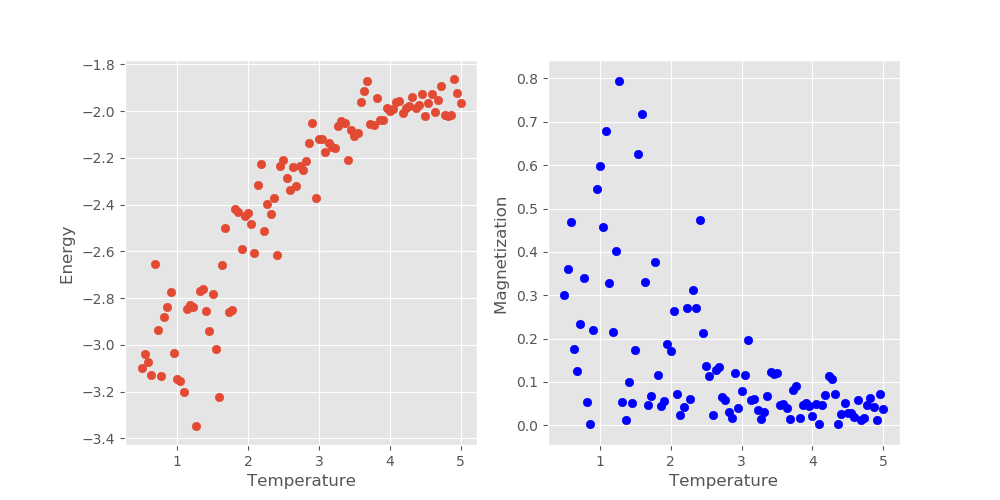

In [241]:
for t in range(Nt):
    print("Complete", t/Nt*100, '%\r', end='')
    
    Esum = Msum = 0
    state = getInitialState(N)
    
    for i in range(eqSteps):         # установление статистического равновесия
        makeFlip(T[t], state)          

    for i in range(steps):           # суммирование по разным состояниям близким к равновеснсому
        makeFlip(T[t], state)          
        Esum += getEnergy(state)       
        Msum += getMagnetization(state) 

    E[t] = Esum / (steps * N * N)
    M[t] = Msum / (steps * N * N)

print("Done              \r", end='')

_, ax = plt.subplots(1,2,figsize=(10, 5));

ax[0].scatter(T, E)
ax[0].set_xlabel("Temperature");
ax[0].set_ylabel("Energy ");

ax[1].scatter(T, abs(M), color = 'blue')
ax[1].set_xlabel("Temperature"); 
ax[1].set_ylabel("Magnetization ");

Интерпретируйте с точки зрения физики полученные графики. Описывают ли они поведение ферромагнетиков и фазовые переходы?

Известно, что магнитные свойства вещества зависят от температуры. Видим, что с её повышением ферромагнитный материал теряет способность иметь намагниченность в отсутвие внешнего поля - картина похожа на фазовый переход второго рода (ферромагнетик-парамагнетик).

Вроде, нам известно, что температура и магнитные свойства вещест связаны. Из графика мы можем увидеть, что если будем повышать температуру, то ферромагнитый материал будет иметь все меньшую и меньшую намагниченность.

Задайте новое сосотояние системы с достаточно большим $N$ и визуализируйте его думя цветами (например с помощью `plt.scatter`). Примените несколько раз к этому сосотоянию функциию makeFlip с низкой и с высокой температурами. Объясните наблюдаемое

In [277]:
N = 64
state = getInitialState(N)

Чтобы нам сделать картинку, необходимо как-то выцепить элементы со спином +1 и -1. Для этого напишем две программы up(+1) и down(-1), которые будут нам выбирать нужные спины, сохраняя их "координаты".

In [278]:
def up(state,N):
    x = []
    y = []
    for i in range(N):
        for j in range(N):
            if state[i][j] == 1:
                x.append(i)
                y.append(j)
    return x,y

In [279]:
def down(state,N):
    x = []
    y = []
    for i in range(N):
        for j in range(N):
            if state[i][j] == -1:
                x.append(i)
                y.append(j)
    return x,y

<IPython.core.display.Javascript object>


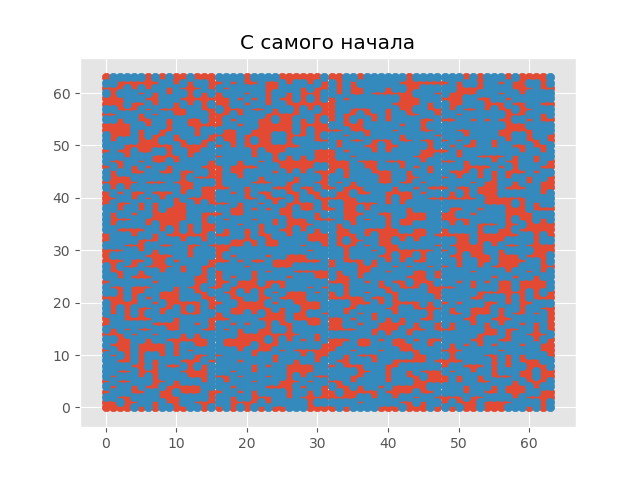

In [281]:
plt.figure()
plt.scatter(up(state, N)[0], up(state, N)[1])
plt.scatter(down(state, N)[0], down(state, N)[1])
plt.title("С самого начала")
plt.show()

<IPython.core.display.Javascript object>


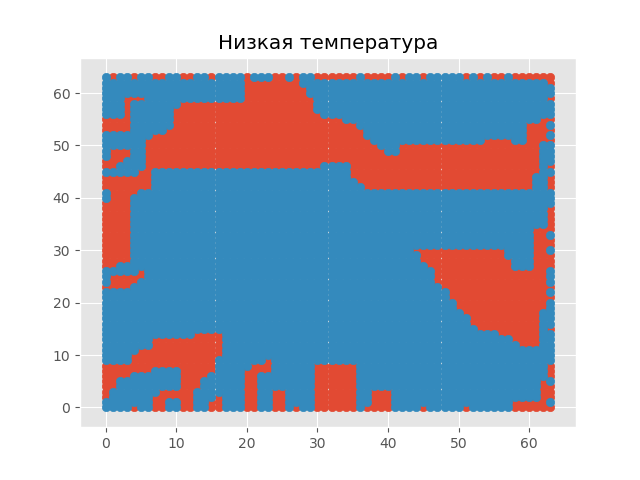

Text(0.5, 1.0, 'Низкая температура')

In [273]:
state_copy = state
for i in range(100):
    state_copy = makeFlip(0.5, state_copy);
plt.figure()
plt.scatter(up(state_copy, N)[0], up(state_copy, N)[1])
plt.scatter(down(state_copy, N)[0], down(state_copy, N)[1])
plt.title("Низкая температура")

<IPython.core.display.Javascript object>


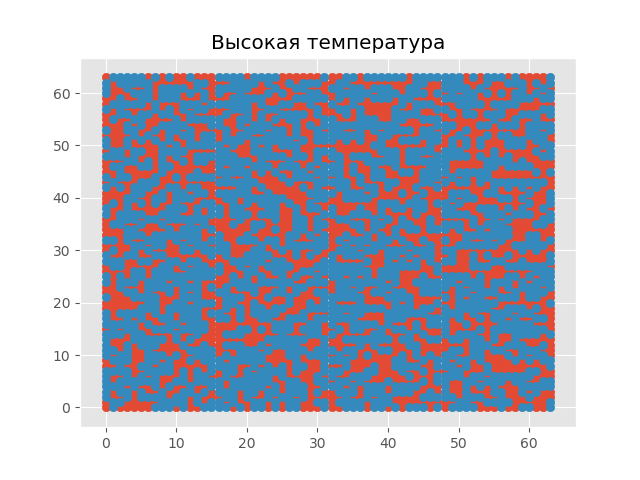

In [282]:
state_copy = state
for i in range(100):
    state_copy = makeFlip(10, state_copy);
plt.figure()
plt.scatter(up(state_copy, N)[0], up(state_copy, N)[1])
plt.scatter(down(state_copy, N)[0], down(state_copy, N)[1])
plt.title("Высокая температура")
plt.show()

Видим, что при большой температуре на картинке есть только сплошшной хаос, в то время, как при маленьких температурах есть более менее упорядоченность, то есть группы, в которых спины направлены в одну сторону. 